**Create a WordCloud with Coronavirus dataset**

In [16]:
'''Import basic modules'''
import pandas as pd
import numpy as np
'''Import visualisation - matplotlib, seaborn'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import os 
from os import path

In [3]:
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Corona virus - Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A ** novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.

The recent outbreak of coronavirus is believed to have occurred in a market for illegal wildlife in the central Chinese city of Wuhan. Chinese health authorities and the WHO are investigating the outbreak of the recent coronavirus which has claimed 17 lives and reportedly infected hundreds.

**Importing the dataset**

In [5]:
"""Reading the dataset"""
data=pd.read_csv("2019_nCoV_data.csv",)

In [6]:
#Display the first 5 values
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [7]:
#Obtain the column name and datatype values of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
Sno               770 non-null int64
Date              770 non-null object
Province/State    585 non-null object
Country           770 non-null object
Last Update       770 non-null object
Confirmed         770 non-null int64
Deaths            770 non-null int64
Recovered         770 non-null int64
dtypes: int64(4), object(4)
memory usage: 48.2+ KB


In [8]:
#Obtain a brief summary of the dataset
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,770.000000,770.000000,770.000000,770.000000
mean,385.500000,160.207792,3.436364,4.264935
std,222.424144,1015.504102,31.553727,28.718715
min,1.000000,0.000000,0.000000,0.000000
25%,193.250000,2.000000,0.000000,0.000000
50%,385.500000,8.000000,0.000000,0.000000
75%,577.750000,58.750000,0.000000,1.000000
max,770.000000,16678.000000,479.000000,522.000000


In [9]:
#Identify the number of rows and columns
data.shape

(770, 8)

In [10]:
#Create a word cloud 
state = data.groupby("Province/State")
state.describe().head()

Sno                                                        \
               count        mean         std    min     25%    50%     75%   
Province/State                                                               
Anhui           14.0  321.500000  226.184319    1.0  142.00  299.0  487.75   
Arizona          6.0  333.833333  100.078802  205.0  265.00  330.5  399.00   
Bavaria          5.0  375.200000   87.305212  267.0  319.00  373.0  429.00   
Beijing         14.0  325.000000  228.941376    2.0  143.25  305.0  493.50   
Boston, MA       4.0  662.000000   89.080488  559.0  610.00  661.5  713.50   

                      Confirmed              ... Deaths      Recovered  \
                  max     count        mean  ...    75%  max     count   
Province/State                               ...                         
Anhui           707.0      14.0  203.214286  ...    0.0  0.0      14.0   
Arizona         472.0       6.0    1.000000  ...    0.0  0.0       6.0   
Bavaria         488.0       5.0    4.000000  ...    0.0  0.0       5.0   
Beijing         713.0      14.0  110.500000  ...    1.0  1.0      14.0   
Boston, MA      766.0       4.0    1.000000  ...    0.0  0.0       4.0   

                                                              
                    mean       std  min  25%  50%  75%   max  
Province/State                                                
Anhui           3.857143  6.099901  0.0  0.0  1.0  4.5  20.0  
Arizona         0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
Bavaria         0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
Beijing         5.571429  6.173321  0.0  2.0  4.0  8.0  23.0  
Boston, MA      0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  

[5 rows x 32 columns]

In [11]:
state.mean().sort_values(by="Confirmed",ascending=False).head()

,Sno,Confirmed,Deaths,Recovered
Province/State,,,,
Hubei,318.214286,5584.000000,181.857143,148.214286
Zhejiang,322.214286,385.142857,0.000000,14.571429
Guangdong,318.714286,345.785714,0.000000,9.000000
Henan,321.214286,291.714286,1.357143,6.285714
Hunan,322.071429,264.714286,0.000000,6.142857


**Creating a WordCloud**

In [12]:
#Start with the text
data.dropna(subset=['Province/State'], inplace=True)
data = data.rename(columns={'Province/State': 'State'})
text = data.State
text


0                 Anhui
1               Beijing
2             Chongqing
3                Fujian
4                 Gansu
5             Guangdong
6               Guangxi
7               Guizhou
8                Hainan
9                 Hebei
10         Heilongjiang
11                Henan
12            Hong Kong
13                Hubei
14                Hunan
15       Inner Mongolia
16              Jiangsu
17              Jiangxi
18                Jilin
19             Liaoning
20                Macau
21              Ningxia
22              Qinghai
23              Shaanxi
24             Shandong
25             Shanghai
26               Shanxi
27              Sichuan
28               Taiwan
29              Tianjin
             ...       
719              Hainan
720            Liaoning
721              Shanxi
722             Tianjin
723             Guizhou
724               Gansu
725               Jilin
726      Inner Mongolia
727             Ningxia
728            Xinjiang
732           Ho

In [13]:
#Create and generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white").generate(''.join(text))


In [14]:
text = " ".join(count for count in data.State)
print("There are {} words in the combination of all States.".format(len(text)))

There are 5106 words in the combination of all States.


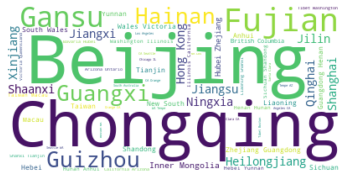

In [17]:
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()